# How many bicycles will be rented during the next month?

## Zainab Abdul Kareem Dinar

Dataset: https://www.kaggle.com/c/bike-sharing-demand/data



### Installing the necessary libraries

In [ ]:
! pip install kaggle

### Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import accuracy_score, mean_squared_error


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 /content/kaggle.json
! kaggle competitions download -c bike-sharing-demand

mkdir: cannot create directory ‘/root/.kaggle’: File exists
bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/bike-sharing-demand.zip

Archive:  /content/bike-sharing-demand.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Reading the data

In [ ]:
data = pd.read_csv("/content/train.csv")
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


|index|datetime|season|holiday|workingday|weather|temp|atemp|humidity|windspeed|casual|registered|count|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|2011-01-01 00:00:00|1|0|0|1|9\.84|14\.395|81|0\.0|3|13|16|
|1|2011-01-01 01:00:00|1|0|0|1|9\.02|13\.635|80|0\.0|8|32|40|
|2|2011-01-01 02:00:00|1|0|0|1|9\.02|13\.635|80|0\.0|5|27|32|
|3|2011-01-01 03:00:00|1|0|0|1|9\.84|14\.395|75|0\.0|3|10|13|
|4|2011-01-01 04:00:00|1|0|0|1|9\.84|14\.395|75|0\.0|0|1|1|

### How many rows are in your dataset?

In [ ]:
nrows = data.shape[0]
ncols = data.shape[1]

nrows, ncols

(10886, 12)

nrows:  10886  & ncols:  12

### What are the types of data and is there any missing data?

In [ ]:
data_info = data.info
data_info

<bound method DataFrame.info of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0  

In [ ]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Convert the datetime columns to datetime type

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])

### Print the rental totals for the first ten days

<Axes: xlabel='datetime'>

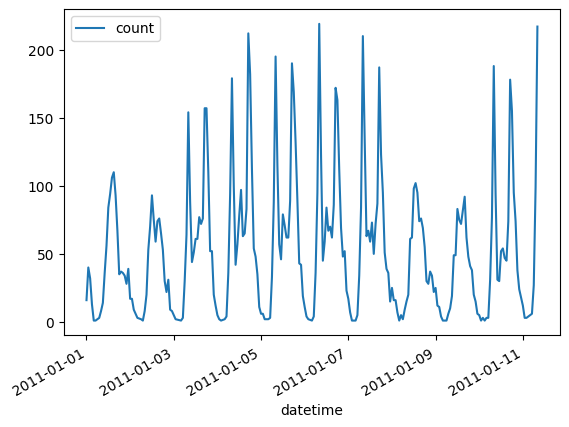

In [ ]:
data[:24*10].plot(x='datetime', y='count')

### Data preprocessing
#### Convert categorical data into numeric data

**Hint**: Use get_dummies()

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


|index|datetime|season|holiday|workingday|weather|temp|atemp|humidity|windspeed|casual|registered|count|season\_1|season\_2|season\_3|season\_4|weather\_1|weather\_2|weather\_3|weather\_4|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|2011-01-01 00:00:00|1|0|0|1|9\.84|14\.395|81|0\.0|3|13|16|1|0|0|0|1|0|0|0|
|1|2011-01-01 01:00:00|1|0|0|1|9\.02|13\.635|80|0\.0|8|32|40|1|0|0|0|1|0|0|0|
|2|2011-01-01 02:00:00|1|0|0|1|9\.02|13\.635|80|0\.0|5|27|32|1|0|0|0|1|0|0|0|
|3|2011-01-01 03:00:00|1|0|0|1|9\.84|14\.395|75|0\.0|3|10|13|1|0|0|0|1|0|0|0|
|4|2011-01-01 04:00:00|1|0|0|1|9\.84|14\.395|75|0\.0|0|1|1|1|0|0|0|1|0|0|0|

### Drop unnecessary columns

In [ ]:
cols_to_drop = ['season', 'casual', 'registered']
data = data.drop(columns=cols_to_drop)

#### Do the data standardization process on numeric data

In [ ]:
quant_features = ['atemp', 'humidity', 'windspeed']
scaler = StandardScaler()
data[quant_features] = scaler.fit_transform(data[quant_features])

|index|temp|humidity|windspeed|
|---|---|---|---|
|0|-1\.33359943580326|0\.9931674345025112|-1\.5676816572165309|
|1|-1\.4388411151548441|0\.9412059758972614|-1\.5676816572165309|
|2|-1\.4388411151548441|0\.9412059758972614|-1\.5676816572165309|
|3|-1\.33359943580326|0\.6813986828710121|-1\.5676816572165309|
|4|-1\.33359943580326|0\.6813986828710121|-1\.5676816572165309|
|5|-1\.33359943580326|0\.6813986828710121|-0\.8324042300111806|

#### Extract historical data such as hour, day, month and year

In [ ]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour

#### Delete the original datetime column after extracting useful information from it

In [ ]:
data.drop("datetime", axis=1, inplace=True)

|index|holiday|workingday|temp|atemp|humidity|windspeed|count|season\_1|season\_2|season\_3|season\_4|weather\_1|weather\_2|weather\_3|weather\_4|hour|day|month|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|0|0|-1\.33359943580326|14\.395|0\.9931674345025112|-1\.5676816572165309|16|1|0|0|0|1|0|0|0|0|1|1|
|1|0|0|-1\.4388411151548441|13\.635|0\.9412059758972614|-1\.5676816572165309|40|1|0|0|0|1|0|0|0|1|1|1|
|2|0|0|-1\.4388411151548441|13\.635|0\.9412059758972614|-1\.5676816572165309|32|1|0|0|0|1|0|0|0|2|1|1|
|3|0|0|-1\.33359943580326|14\.395|0\.6813986828710121|-1\.5676816572165309|13|1|0|0|0|1|0|0|0|3|1|1|
|4|0|0|-1\.33359943580326|14\.395|0\.6813986828710121|-1\.5676816572165309|1|1|0|0|0|1|0|0|0|4|1|1|

#### Plot a simple graphs of the average number of rentals per hour and per month

<Axes: xlabel='hour'>

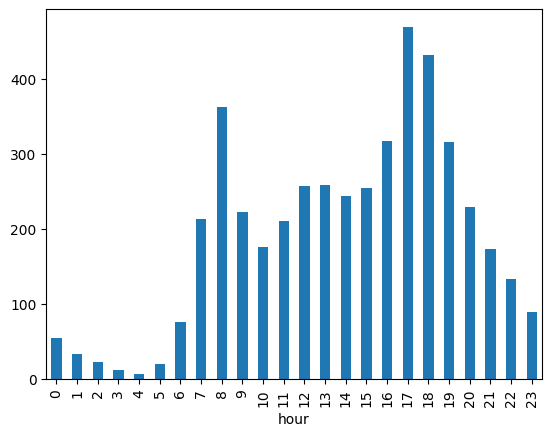

In [ ]:
count_per_hour = data.groupby('hour')['count'].mean()
count_per_hour.plot(kind='bar')

#### Now plot the rental times by month

<Axes: xlabel='month'>

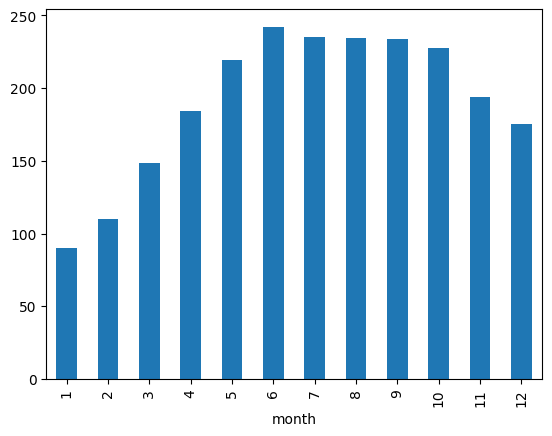

In [ ]:
count_by_month = data.groupby('month')['count'].mean()
count_by_month.plot(kind='bar')

### Modeling

In [ ]:
X = data.drop('count', axis=1)
y = data['count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### With Linear Regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model_predictions = linear_model.predict(X_test)
linear_model_score = mean_squared_error(y_test, linear_model_predictions)

In [ ]:
linear_model_score

19947.376555155082

#### With Logistic Regression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_model_predictions= logistic_model.predict(X_test)
logistic_model_score = mean_squared_error(y_test, logistic_model_predictions)
logistic_model_accuracy = accuracy_score(y_test, logistic_model_predictions)

In [ ]:
logistic_model_accuracy

0.024334251606978878

In [ ]:
logistic_model_score

26193.43388429752

#### With K-Nearest Neighbor

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train, y_train)
knn_model_predictions = knn_model.predict(X_test)


In [ ]:
knn_model.score(X_test, y_test)

0.6117814025137844

#### With Decision Tree

In [ ]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_model_accuracy = decision_tree_model.score(X_test, y_test)

In [ ]:
decision_tree_model_accuracy

0.8940389526234618

#### With Random Forest

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model_predictions = random_forest_model.predict(X_test)
random_forest_model_score = mean_squared_error(y_test, random_forest_model_predictions)


In [ ]:
random_forest_model_score

2237.1907826170736

#### With XGBOOST

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_model_predictions = xgb_model.predict(X_test)

In [ ]:
xgb_model.score(X_test, y_test)

0.9469072553573857

#### Evaluating the models

In [ ]:
print("linearRegression modele score:", linear_model_score)
print("logisticRegression model score:", logistic_model_accuracy)
print("KNN Model score:", knn_model.score(X_test, y_test))
print("DecisionTree model score:", decision_tree_model_accuracy)
print("RandomForest model score:", random_forest_model_score)
print("XGB model score:", xgb_model.score(X_test, y_test))

linearRegression modele score: 19947.376555155082
logisticRegression model score: 0.024334251606978878
KNN Model score: 0.6117814025137844
DecisionTree model score: 0.8940389526234618
RandomForest model score: 2237.1907826170736
XGB model score: 0.9469072553573857


### Fine-Tuning the models

In [ ]:
#Fine-tuning KNN Model
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_model_predictions = knn_model.predict(X_test)

knn_model.score(X_test, y_test)

0.6080874712593523

In [ ]:
#Fine-tuning DecisionTree Model
decision_tree_model = DecisionTreeRegressor(max_depth=10)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_model_accuracy = decision_tree_model.score(X_test, y_test)

decision_tree_model_accuracy

0.900675066472856

In [ ]:
#Fine-tuning XGB Model
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.1,
    random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model_predictions = xgb_model.predict(X_test)

xgb_model.score(X_test, y_test)


0.956929666913778